In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

#Transfer Learning Libs
#from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import os

#your dataset folder directory
data_dir = "FaceShape Dataset"

#define the 4 training directories class
heart_training_dir = os.path.join(data_dir, "training_set", "Heart")
oblong_training_dir = os.path.join(data_dir, "training_set", "Oblong")
oval_training_dir = os.path.join(data_dir,"training_set", "Oval")
round_training_dir = os.path.join(data_dir,"training_set", "Round")
square_training_dir = os.path.join(data_dir,"training_set", "Square")

#define the 4 validation directories class
heart_validation_dir = os.path.join(data_dir, "testing_set", "Heart")
oblong_validation_dir = os.path.join(data_dir, "testing_set", "Oblong")
oval_validation_dir = os.path.join(data_dir,"testing_set", "Oval")
round_validation_dir = os.path.join(data_dir,"testing_set", "Round")
square_validation_dir = os.path.join(data_dir,"testing_set", "Square")

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

#No need to augment data because it leads to underfitting
TRAINING_DIR ="FaceShape Dataset\\training_set"
training_datagen = ImageDataGenerator(
    #validation_split=0.2,
    rescale=1./255.0,
    #rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #preprocessing_function=preprocess_input,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    #fill_mode='nearest'
)


VALIDATION_DIR = "FaceShape Dataset\\testing_set"
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(256,256),
    class_mode='categorical',
    seed = 42,
    batch_size = 16
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(256,256),
    class_mode='categorical',
    seed=42,
    batch_size= 16
)

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [11]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(256,256,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='elu'),
    tf.keras.layers.Dense(512, activation='elu'),
    tf.keras.layers.Dense(512, activation='elu'),
    tf.keras.layers.Dense(512, activation='elu'),
    tf.keras.layers.Dense(5, activation= 'sigmoid')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dropout (Dropout)           (None, 123008)            0

In [13]:
model.compile(loss = 'categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [14]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data = validation_generator,
                    verbose = True,
                    validation_steps=3)

Epoch 1/10
250/250 [==============================] - 695s 3s/step - loss: 1.9866 - accuracy: 0.2453 - val_loss: 1.6354 - val_accuracy: 0.2708
Epoch 2/10
250/250 [==============================] - 586s 2s/step - loss: 1.5719 - accuracy: 0.2990 - val_loss: 1.6537 - val_accuracy: 0.2917
Epoch 3/10
250/250 [==============================] - 604s 2s/step - loss: 1.4573 - accuracy: 0.3910 - val_loss: 1.6378 - val_accuracy: 0.3125
Epoch 4/10
250/250 [==============================] - 578s 2s/step - loss: 1.2390 - accuracy: 0.5000 - val_loss: 2.9398 - val_accuracy: 0.2708
Epoch 5/10
250/250 [==============================] - 570s 2s/step - loss: 0.9910 - accuracy: 0.6183 - val_loss: 2.6207 - val_accuracy: 0.2500
Epoch 6/10
250/250 [==============================] - 583s 2s/step - loss: 0.6983 - accuracy: 0.7420 - val_loss: 2.7286 - val_accuracy: 0.3750
Epoch 7/10
250/250 [==============================] - 824s 3s/step - loss: 0.4784 - accuracy: 0.8317 - val_loss: 2.3853 - val_accuracy: 0.3333

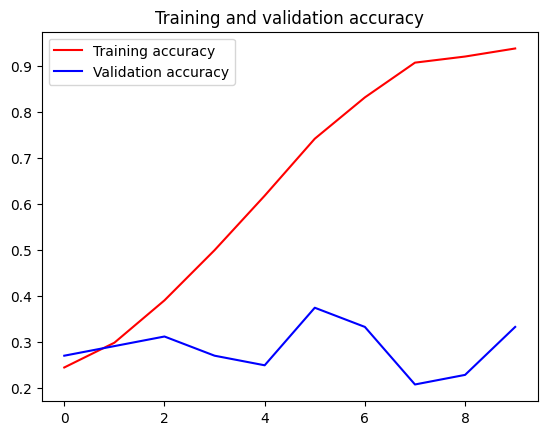

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

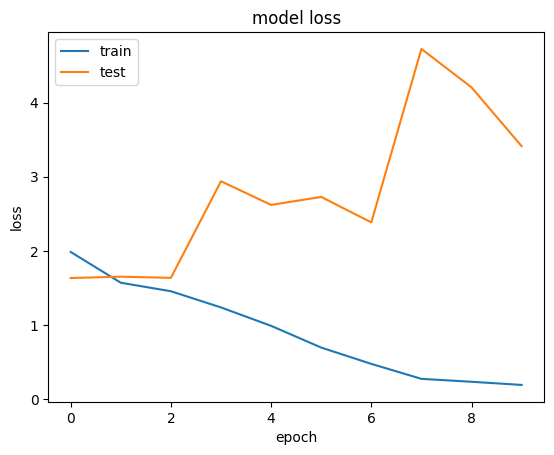

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
file_location = 'D:\\BANGKIT\\CAPSTONE\\FACE_model.h5'
model.save(file_location)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
import tensorflow as tf

model_path = "/tmp/model"

tf.saved_model.save(model, model_path)
import pathlib

def Tensolite(model_path, optm, filename="FACE_model"):
  lite = tf.lite.TFLiteConverter
  lite_model = lite.from_saved_model(model_path)
  if optm:
    lite_model.optimizations = optm
  tflite_model = lite_model.convert()
  tflite_model_file = pathlib.Path(f"{filename}.tflite")
  tflite_model_file.write_bytes(tflite_model)
  return tflite_model

optm = [tf.lite.Optimize.DEFAULT]

filemega = lambda filepath : os.path.getsize(filepath) / float(2**20)

tflite_model = Tensolite(model_path, optm=optm, filename="FACE_model")

round(filemega("face_model.tflite"), 3)

INFO:tensorflow:Assets written to: /tmp/model\assets


INFO:tensorflow:Assets written to: /tmp/model\assets


60.835

In [19]:
import tkinter as tk
from tkinter import filedialog
from tkinter.filedialog import askopenfile
from PIL import Image, ImageTk
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Function to call the upload file dialog box
def upload_file():
    global img, predict_path
    f_types = [('Image Files', '*.jpg;*.jpeg;*.png')]
    filename = filedialog.askopenfilename(filetypes=f_types)
    predict_path = filename
    img = ImageTk.PhotoImage(file=filename)
    my_w.destroy()

my_w = tk.Tk()
my_w.geometry("400x300")
my_w.title('Upload Your Face Shape Image')
my_font1 = ('times', 18, 'bold')
l1 = tk.Label(my_w, text='Upload Your Face Shape Image', width=30, font=my_font1)
l1.grid(row=1, column=1)
b1 = tk.Button(my_w, text='Upload File', width=20, command=lambda: upload_file())
b1.grid(row=2, column=1)

my_w.mainloop()


model = load_model('FACE_model.h5')  

# Load and preprocess the image
img = image.load_img(predict_path, target_size=(256, 256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.0

# Make predictions
classes = model.predict(x)

# Map predictions to face shapes
face_shapes = {0: 'Heart', 1: 'Oblong', 2: 'Oval', 3: 'Round', 4: 'Square'}
predicted_face_shape = face_shapes[np.argmax(classes)]

print(f"The predicted face shape is: {predicted_face_shape}")


1/1 [==============================] - 2s 2s/step
The predicted face shape is: Oval
